# Problem Statement

<div style = "direction: rtl;" >
    مجموعه داده ی ضمیمه شده یک بازی موبایلی را نمایش میدهد. این بازی موبایلی کاربران خود را
به دو گروه تقسیمبندی کرده است و به گروه اول تبلیغاتی نمایش داده نشده است ولی در گروه دوم
تبلیغات مرتبط با بازی نمایش داده شده است 
    )در ستون version این دو گروه قابل مشاهده
هستند(. همچنین در ستون gamerounds_sum تعداد دفعاتی که هر کاربر )هر سطر( بازی کرده
است را مشاهده میکنید.
در ستون version در گروه 30gate کاربرانی که برای آنها تبلیغات نمایش داده نشده هستند و در
گروه 40gate کاربرانی قرار دارند که تبلیغات جالب برای آنها نمایش داده شده است.
با استفاده از تستهای آماری )TTest یا UTest یا Codebase )سعی کنید متوجه شوید که آیا
تبلیغات موثر بوده است یا خیر؟ یعنی تبلیغات باعث افزایش تعداد دورهای بازی برای بازیکنان در
gamerounds_sum شده است یا خیر؟
</div>    

# Import Libraries

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random

# Read Dataset

In [7]:
df = pd.read_csv('mibilegame.csv')

original_df=df
original_df.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


# Data Exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [9]:
df.describe(include='all')

,userid,version,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189,90189.000000,90189,90189
unique,NaN,2,NaN,2,2
top,NaN,gate_40,NaN,False,False
freq,NaN,45489,NaN,50036,73408
mean,4.998412e+06,NaN,51.872457,NaN,NaN
std,2.883286e+06,NaN,195.050858,NaN,NaN
min,1.160000e+02,NaN,0.000000,NaN,NaN
25%,2.512230e+06,NaN,5.000000,NaN,NaN
50%,4.995815e+06,NaN,16.000000,NaN,NaN
75%,7.496452e+06,NaN,51.000000,NaN,NaN


# Data Cleansing

### Duplicate Users

In [10]:
#duplicate user?
df.groupby('version')['userid'].agg({'count','nunique'})

,count,nunique
version,,
gate_30,44700,44700
gate_40,45489,45489


In [11]:
# duplicate?
dups = df.duplicated()
print(dups.any())

False


In [12]:
#duplicated user_id?
df[df["userid"].duplicated()]

,userid,version,sum_gamerounds,retention_1,retention_7


,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44700.0,52.456264,256.716423,0.0,5.0,17.0,50.0,49854.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


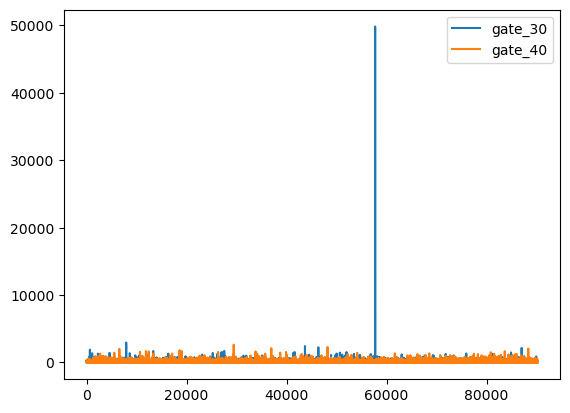

In [13]:
df.groupby('version')['sum_gamerounds'].plot(legend=True)
df.groupby('version')['sum_gamerounds'].describe()

### Find optimized way to remove Outliers

In [14]:
def outliers_IQR (mydata , variable):
    q1 = mydata[variable].quantile(0.25)
    q3 = mydata[variable].quantile(0.75)
    iqr = q3 - q1
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr   
    # Filter the outliers from the DataFrame
    filtered_data = (mydata[variable] >= lower_bound) & (mydata[variable] <= upper_bound)
    return mydata[filtered_data]

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,39638.0,23.945179,27.152547,0.0,4.0,13.0,35.0,120.0
gate_40,40374.0,24.012558,27.800704,0.0,4.0,13.0,34.0,120.0


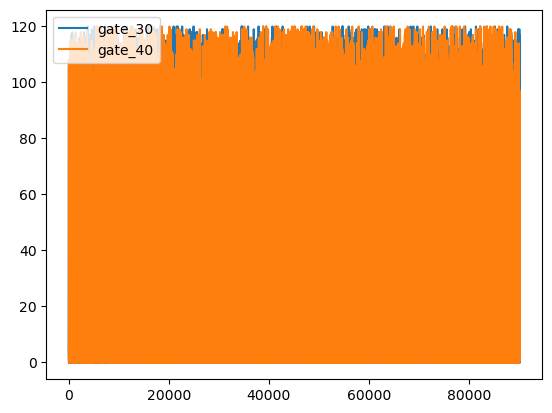

In [15]:
cleaned_df_iqr = outliers_IQR (df , "sum_gamerounds")

cleaned_df_iqr.groupby('version')['sum_gamerounds'].plot(legend=True)
cleaned_df_iqr.groupby('version')['sum_gamerounds'].describe()

In [16]:

def outlier_zscore(mydate,  vriable ,threshold=3):
    # Extract the column as a 1-dimensional array
    data = mydate[vriable].values

    # Calculate the Z-scores for the variable
    z_scores = np.abs(stats.zscore(data))

    # Find the indices of outliers based on the threshold
    outlier_indices = np.where(z_scores > threshold)[0]

    # Remove the outliers from the DataFrame
    df_cleaned = df.drop(outlier_indices)

    return df_cleaned



,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44500.0,47.486494,81.340691,0.0,5.0,17.0,50.0,637.0
gate_40,45264.0,46.951706,79.976331,0.0,5.0,16.0,51.0,637.0


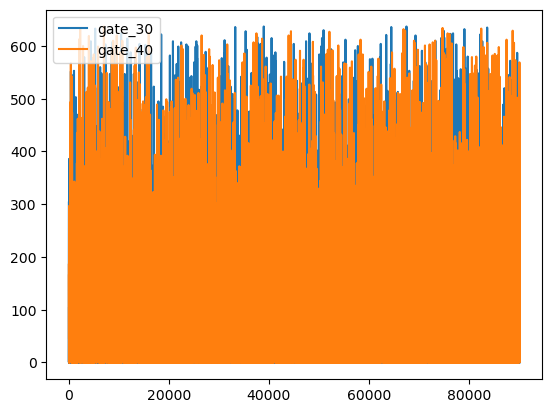

In [17]:

cleaned_df_zscore = outlier_zscore(df, 'sum_gamerounds')


cleaned_df_zscore.groupby('version')['sum_gamerounds'].plot(legend=True)
cleaned_df_zscore.groupby('version')['sum_gamerounds'].describe()

,count,mean,std,min,25%,50%,75%,max
version,,,,,,,,
gate_30,44699.0,51.342111,102.057598,0.0,5.0,17.0,50.0,2961.0
gate_40,45489.0,51.298776,103.294416,0.0,5.0,16.0,52.0,2640.0


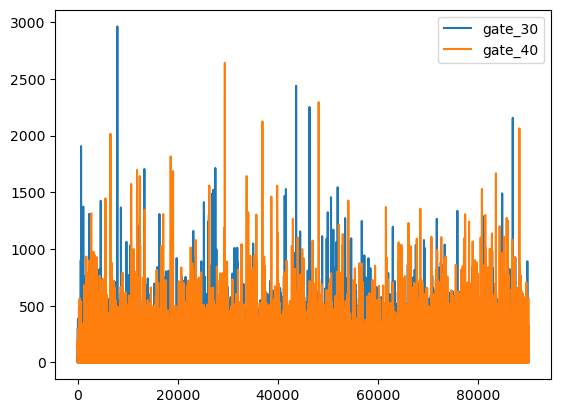

In [18]:


max_data = df["sum_gamerounds"].max()
df[(df["sum_gamerounds"] == max_data)]
cleaned_df=df[(df["sum_gamerounds"] < max_data)]

cleaned_df.groupby('version')['sum_gamerounds'].plot(legend=True)
cleaned_df.groupby('version')['sum_gamerounds'].describe()


In [19]:
import numpy as np

def filter_percentiles(data,variable, low_percentile=1, high_percentile=99):
    """
    Filters out the bottom and top percentiles of a dataset.

    Parameters:
        data (array-like): The data to be filtered.
        low_percentile (float): The lower percentile value. Default is 1.
        high_percentile (float): The upper percentile value. Default is 99.

    Returns:
        An array containing the filtered data.
    """
    low_val = np.percentile(data[variable], low_percentile)
    high_val = np.percentile(data[variable], high_percentile)
    filtered_data = data[(data[variable] >= low_val) & (data[variable] <= high_val)]
    return filtered_data

In [20]:
x = filter_percentiles(cleaned_df, "sum_gamerounds",low_percentile=1, high_percentile=99)

histogrsm of originsl data


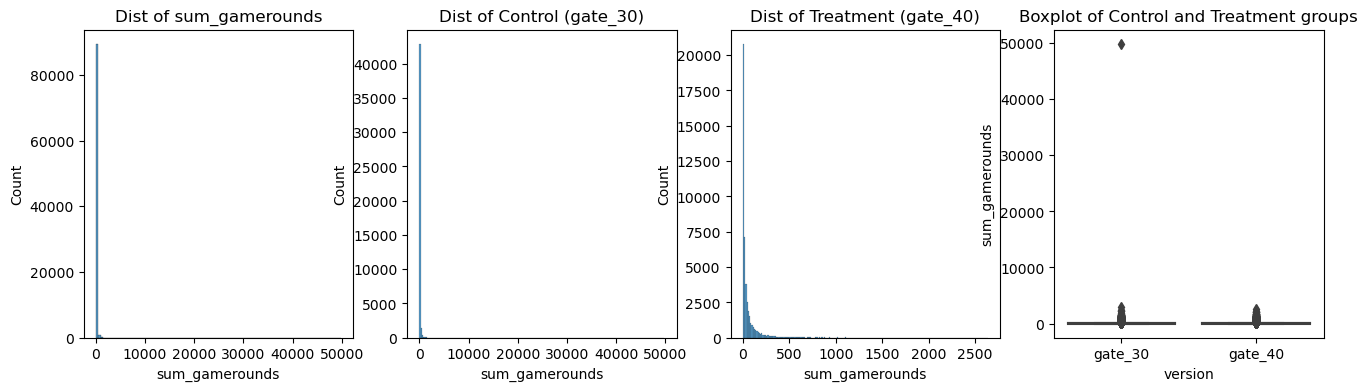

histogrsm of cleaned data


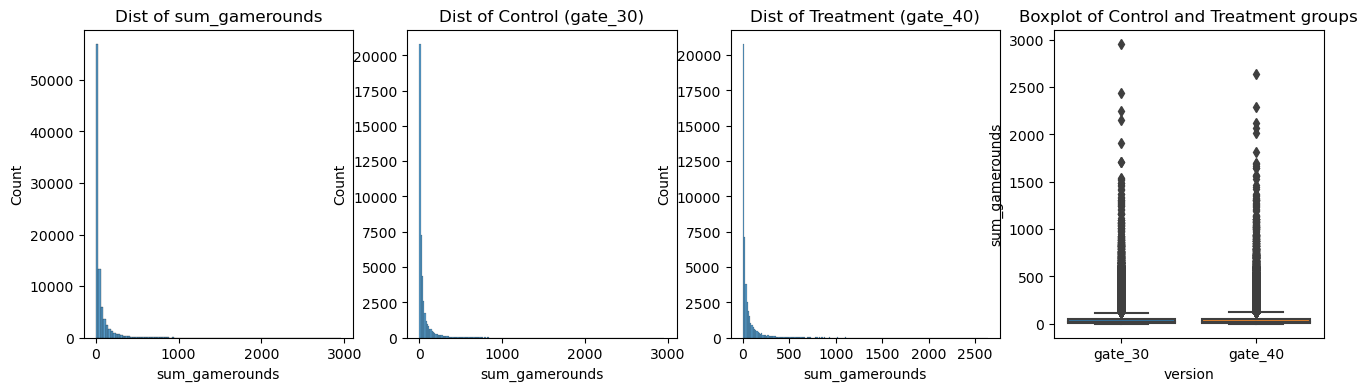

histogrsm of cleaned data


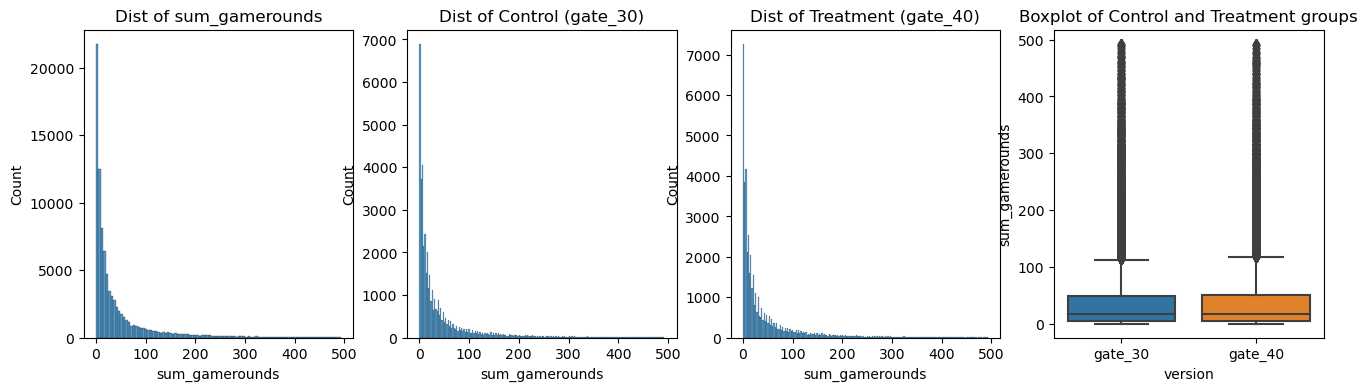

In [21]:
def plot_hist (data) :
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    sns.histplot(data['sum_gamerounds'], bins=100, ax=axes[0])
    sns.histplot(data[data['version'] == 'gate_30']['sum_gamerounds'], bins=200, ax=axes[1])
    sns.histplot(data[data['version'] == 'gate_40']['sum_gamerounds'], bins=200, ax=axes[2])
    sns.boxplot(x='version', y='sum_gamerounds', data=data, ax=axes[3])

    axes[0].set_title('Dist of sum_gamerounds')
    axes[1].set_title('Dist of Control (gate_30)')
    axes[2].set_title('Dist of Treatment (gate_40)')
    axes[3].set_title('Boxplot of Control and Treatment groups')
    plt.show()
print ( "histogrsm of originsl data"    )
plot_hist(df)
print ( "histogrsm of cleaned data"    )
plot_hist(cleaned_df)

print ( "histogrsm of cleaned data"    )
plot_hist(x)



In [22]:
def plot_pi(mydf , agg_value , cat_value):
    plt.figure(figsize=(3,3))

    grouped_counts = mydf.groupby(cat_value)[agg_value].count()
    grouped_counts.plot.pie(autopct='%1.1f%%')

    # Set the title and axis labels
    plt.title("Distribution of " + agg_value +" by " + cat_value ,fontsize=10)
    plt.ylabel('')

    # Show the plot
    plt.show()
    # Plot the data as a pie chart
    

# check if experiment and control group is balanced or not

In [23]:
# Percentage of players in control and treatment groups
experiment ,control = cleaned_df['version'].value_counts()[0], cleaned_df['version'].value_counts()[1]
print(f'{control / cleaned_df.shape[0] * 100:.2f}% of users in control group')
print(f'{experiment / cleaned_df.shape[0] * 100:.2f}% of users in experiment group')

49.56% of users in control group
50.44% of users in experiment group


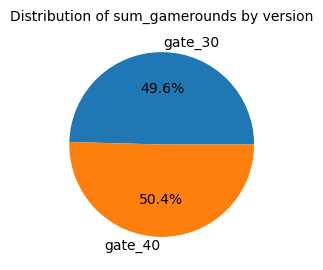

In [24]:

plot_pi(cleaned_df, "sum_gamerounds" ,"version")




# Minimum sample size

In [25]:
import math

def sample_size_calculator(population_size, confidence_level, margin_of_error):
    z_score = {
        0.90: 1.645,
        0.95: 1.96,
        0.99: 2.576
    }
    
    z = z_score[confidence_level]
    p = 0.5 # assuming 50% for a conservative estimate of the sample size
    q = 1 - p
    
    sample_size = ((z**2) * p * q * population_size) / ((z**2 * q) + ((margin_of_error**2) * (population_size - 1)))
    return math.ceil(sample_size)

In [26]:
#compute sample size 
pop_size = df.shape[0]
conf_level = 0.99
margin_err = 0.03

sample_size = sample_size_calculator(pop_size, conf_level, margin_err)
print(f"The population size is :{pop_size} \nThe required sample size is: {sample_size}")

The population size is :90189 
The required sample size is: 1771


# Expriment and Control Datasets

In [27]:
gate_40 = cleaned_df.loc[cleaned_df["version"] == "gate_40"]["sum_gamerounds"]
gate_30 = cleaned_df.loc[cleaned_df["version"] == "gate_30"]["sum_gamerounds"]


# Normality Test on Datasets

### check skewnwss & curtosis

In [28]:
# all dataset
skewness_test = stats.skewtest(cleaned_df["sum_gamerounds"])
kurtosis_test = stats.kurtosistest(cleaned_df["sum_gamerounds"])
skewness_test , kurtosis_test

(SkewtestResult(statistic=268.7902528566113, pvalue=0.0),
 KurtosistestResult(statistic=178.69920263047266, pvalue=0.0))

In [29]:
# gate_40
skewness_test = stats.skewtest(gate_40)
kurtosis_test = stats.kurtosistest(gate_40)
skewness_test , kurtosis_test


(SkewtestResult(statistic=191.07533592246335, pvalue=0.0),
 KurtosistestResult(statistic=126.44076743451302, pvalue=0.0))

In [30]:
skewness_test = stats.skewtest(gate_30)
kurtosis_test = stats.kurtosistest(gate_30)
skewness_test , kurtosis_test

(SkewtestResult(statistic=189.09443799006212, pvalue=0.0),
 KurtosistestResult(statistic=126.3856679862532, pvalue=0.0))

### Shapiro Test

In [31]:
from scipy.stats import shapiro

def shapiro_test(data, alpha=0.05):
    """
    Performs a Shapiro-Wilk test on the given data.

    Parameters:
        data (array-like): The data to be tested.
        alpha (float): The significance level for the test. Default is 0.05.

    Returns:
        A tuple containing the test statistic, p-value, and a Boolean value indicating
        whether the data is normally distributed or not.
        Also prints whether the null hypothesis (H0) is rejected or not.
    """
    stat, p = shapiro(data)
    print("Shapiro-Wilk test results:")
    print(f"Test statistic: {stat}")
    print(f"P-value: {p}")
    if p > alpha:
        print(f"Failed to reject the null hypothesis (H0) at significance level {alpha}.")
        normal = True
    else:
        print(f"Rejected the null hypothesis (H0) at significance level {alpha}.")
        normal = False
    return stat, p, normal

In [35]:
cleaned_df["version"]

0        gate_30
1        gate_30
2        gate_40
3        gate_40
4        gate_40
          ...   
90184    gate_40
90185    gate_40
90186    gate_30
90187    gate_40
90188    gate_40
Name: version, Length: 90188, dtype: object

In [47]:
stat, p, normal = shapiro_test()
if normal:
    print(" cleaned_df : The data is normally distributed.")
else:
    print(" cleaned_df : The data is not normally distributed.")


stat, p, normal = shapiro_test(gate_30)
if normal:
    print(" gate_30 : The data is normally distributed.")
else:
    print(" gate_30 : The data is not normally distributed.")


stat, p, normal = shapiro_test(gate_40)cleaned_df["sum_gamerounds"]
if normal:
    print(" gate_40 : The data is normally distributed.")
else:
    print(" gate_40 :The data is not normally distributed.")


Shapiro-Wilk test results:
Test statistic: 0.48558658361434937
P-value: 0.0
Rejected the null hypothesis (H0) at significance level 0.05.
 gate_30 : The data is not normally distributed.
Shapiro-Wilk test results:
Test statistic: 0.4886430501937866
P-value: 0.0
Rejected the null hypothesis (H0) at significance level 0.05.
 gate_30 : The data is not normally distributed.
Shapiro-Wilk test results:
Test statistic: 0.48256635665893555
P-value: 0.0
Rejected the null hypothesis (H0) at significance level 0.05.
 gate_40 :The data is not normally distributed.


### Anderson Test

In [51]:
from scipy.stats import anderson

def anderson_test(data, alpha=0.05):
    """
    Performs an Anderson-Darling test on the given data.

    Parameters:
        data (array-like): The data to be tested.
        alpha (float): The significance level for the test. Default is 0.05.

    Returns:
        A tuple containing the test statistic, critical values, and a Boolean value indicating
        whether the data is normally distributed or not.
        Also prints whether the null hypothesis (H0) is rejected or not.
    """
    result = anderson(data)
    print("Anderson-Darling test results:")
    print(f"Test statistic: {result.statistic}")
    print(f"Critical values: {result.critical_values}")
    if result.statistic < result.critical_values[2]:
        print(f"Failed to reject the null hypothesis (H0) at significance level {alpha}.")
        normal = True
    else:
        print(f"Rejected the null hypothesis (H0) at significance level {alpha}.")
        normal = False
    return result.statistic, result.critical_values, normal

In [52]:
stat, crit, normal = anderson_test(cleaned_df["sum_gamerounds"])
if normal:
    print(" cleaned_df : The data is normally distributed.")
else:
    print(" cleaned_df :The data is not normally distributed.")
    
stat, crit, normal = anderson_test(gate_40)
if normal:
    print(" gate_40 : The data is normally distributed.")
else:
    print(" gate_40 :The data is not normally distributed.")

stat, crit, normal = anderson_test(gate_30)
if normal:
    print(" gate_30 : The data is normally distributed.")
else:
    print(" gate_30 :The data is not normally distributed.")    

Anderson-Darling test results:
Test statistic: 13369.548966016475
Critical values: [0.576 0.656 0.787 0.918 1.092]
Rejected the null hypothesis (H0) at significance level 0.05.
 cleaned_df :The data is not normally distributed.
Anderson-Darling test results:
Test statistic: 6742.854185034143
Critical values: [0.576 0.656 0.787 0.918 1.092]
Rejected the null hypothesis (H0) at significance level 0.05.
 gate_40 :The data is not normally distributed.
Anderson-Darling test results:
Test statistic: 6628.496982875906
Critical values: [0.576 0.656 0.787 0.918 1.092]
Rejected the null hypothesis (H0) at significance level 0.05.
 gate_30 :The data is not normally distributed.


# MannWithneyUtest

In [42]:
from scipy.stats import mannwhitneyu

def perform_mannwhitneyu_test(dataframe, group_column,experiment_value, target_variable, alternative='two-sided'):
    """
    Perform Mann-Whitney U test on multiple groups in a dataframe.

    Parameters:
        dataframe (pandas.DataFrame): The dataframe containing the data.
        group_column (str): The column name representing the groups.
        experiment_value (str) : the value of experiment groups.
        target_variable (str): The name of the target variable to compare between groups.
        alternative (str, optional): The alternative hypothesis for the test.
            Can be one of 'two-sided' (default), 'less', or 'greater'.

    Returns:
        dict: A dictionary containing the test results for each group.

    Example:
        result = perform_mannwhitneyu_test(df, 'group_column','experiment_value', 'target_variable')
        print(result)
    """

    unique_groups = dataframe[group_column].unique()
    results = {}
    if experiment_value !=  unique_groups[0] :
        unique_groups[0], unique_groups[1] = unique_groups[1], unique_groups[0]
        
   
    group_A = dataframe[dataframe[group_column] == unique_groups[0]][target_variable]
    group_B = dataframe[dataframe[group_column] == unique_groups[1]][target_variable]
    
    
    statistic, p_value = mannwhitneyu(group_A, group_B, alternative=alternative)
    result = {
        'Hypothesis': f"H0: {target_variable} of {unique_groups[0]} == {target_variable} of {unique_groups[1]}",
        'Test Type': 'Mann-Whitney U Test',
        'Alternative': alternative,
        'Statistic': statistic,
        'p-value': p_value,
        'Conclusion': '',
    }

    if p_value < 0.05:
        result['Conclusion'] = 'Reject the null hypothesis. There is a significant difference between the two groups.'
    else:
        result['Conclusion'] = 'Fail to reject the null hypothesis. There is no significant difference between the two groups.'

    return result



<div style = "direction: rtl;" >
    آیا تفاوت معنا داری بین کسانی که تبلیغ به آنها نشان داده شده و آنهایی که تبلیغ مشاهده نکرده اند برای تعداد دور های 
    بازی وجود دارد؟ 
</br>
فرضیه صفر :تبلیغات تأثیری معنادار بر تعداد دورهای بازی ندارد
</br>
فرضیه جایگزین:تبلیغات تأثیری معنادار بر تعداد دورهای بازی دارد

</div>     


In [43]:
result = perform_mannwhitneyu_test(cleaned_df, 'version','gate_40', 'sum_gamerounds' ,alternative='two-sided')
print(result)

{'Hypothesis': 'H0: sum_gamerounds of gate_40 == sum_gamerounds of gate_30', 'Test Type': 'Mann-Whitney U Test', 'Alternative': 'two-sided', 'Statistic': 1009027049.5, 'p-value': 0.05089155279145376, 'Conclusion': 'Fail to reject the null hypothesis. There is no significant difference between the two groups.'}


<div style = "direction: rtl;" >
     بررسی افزایش تعداد دورهای بازی به علت تبلیغات</br>    
    فرضیه صفر (null hypothesis) : "تبلیغات تأثیری معنی‌دار بر تعداد دورهای بازی (gamerounds_sum) ندارد"
</br>
    فرضیه جایگزین (alternative hypothesis) : "تبلیغات باعث افزایش تعداد دورهای بازی (gamerounds_sum) می‌شود".
</div>

In [44]:
result = perform_mannwhitneyu_test(cleaned_df, 'version','gate_40', 'sum_gamerounds' ,alternative='greater')
print(result)

{'Hypothesis': 'H0: sum_gamerounds of gate_40 == sum_gamerounds of gate_30', 'Test Type': 'Mann-Whitney U Test', 'Alternative': 'greater', 'Statistic': 1009027049.5, 'p-value': 0.97455423878383, 'Conclusion': 'Fail to reject the null hypothesis. There is no significant difference between the two groups.'}


<div style = "direction: rtl;" > 
    بررسی کاهش تعداد دورهای بازی به علت تبلیغات 
</br>
فرضیه صفر (null hypothesis): "تبلیغات تأثیری معنادار بر تعداد دورهای بازی ندارد".
</br>
فرضیه جایگزین (alternative hypothesis): "تبلیغات باعث کاهش معنادار تعداد دورهای بازی می‌شود".
</div>    

In [45]:
result = perform_mannwhitneyu_test(cleaned_df, 'version','gate_40', 'sum_gamerounds' ,alternative='less')
print(result)

{'Hypothesis': 'H0: sum_gamerounds of gate_40 == sum_gamerounds of gate_30', 'Test Type': 'Mann-Whitney U Test', 'Alternative': 'less', 'Statistic': 1009027049.5, 'p-value': 0.02544577639572688, 'Conclusion': 'Reject the null hypothesis. There is a significant difference between the two groups.'}
